## check data

In [1]:
import os

In [2]:
%pwd

'd:\\Projects\\IrisDataPrediction\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'd:\\Projects\\IrisDataPrediction'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv("artifacts/data_ingestion/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,name
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [7]:
X=df.drop("name", axis=1)
y=df["name"]

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [9]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: name, dtype: object

In [10]:
list(df.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'name']

In [11]:
df.shape

(149, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   name          149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [13]:
#no null value
df.isnull().value_counts()

sepal_length  sepal_width  petal_length  petal_width  name 
False         False        False         False        False    149
Name: count, dtype: int64

In [14]:
df.isnull().sum()

df.columns

def checknull(data):
    for i in range(len(data.columns)):
        if(int(df[df.columns[i]].isnull().sum())==0):
            return True


In [15]:
if(int(df[df.columns[0]].isnull().sum()) ==0 ):
    print("hhhhh")



hhhhh


In [16]:
#separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [17]:
X_train.shape, y_train.shape

((104, 4), (104,))

In [18]:
X_train.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.005237,0.879870,0.819177
sepal_width,-0.005237,1.000000,-0.301010,-0.227560
petal_length,0.879870,-0.301010,1.000000,0.957662
petal_width,0.819177,-0.227560,0.957662,1.000000


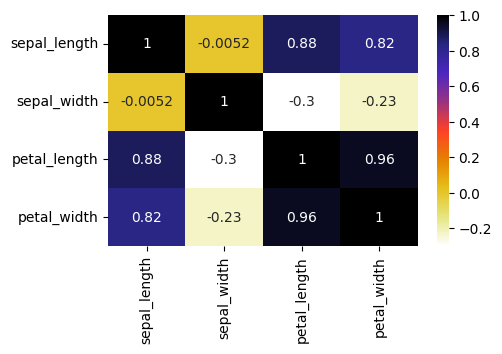

In [19]:
import seaborn as sns

plt.figure(figsize=(5,3))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [20]:
# with the following function we can select highly correlated features
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr=set() #set of the names of correlated columns
    corr_matrix=dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold: #absolute is to compare +ve and -ve correlated columns both with threshold.
                colname= corr_matrix.columns[i] #getting the name of the column
                col_corr.add(colname)
    
    return col_corr

In [21]:
#will use 85% as threshold
corr_features=correlation(X_train, 0.85)
len(set(corr_features))

2

In [22]:
corr_features

{'petal_length', 'petal_width'}

In [23]:
#dropping the correlated features

X_train.drop(corr_features, axis=1)
X_test.drop(corr_features,axis=1)

,sepal_length,sepal_width
73,6.4,2.9
18,5.1,3.8
117,7.7,2.6
78,5.7,2.6
76,6.7,3.0
31,5.2,4.1
64,6.7,3.1
140,6.9,3.1
68,5.6,2.5
82,6.0,2.7


In [24]:
from dataclasses import dataclass
from pathlib import Path

@dataclass
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema: dict  #this is to hold data from schema.yaml

In [25]:
import os
import sys
import pandas as pd
from src.irisdataprediction import logger
from src.irisdataprediction.constants import *
from src.irisdataprediction.utils.common import read_yaml, create_directories
from src.irisdataprediction.exception import IrisPredictionException

In [26]:
class ConfigurationManager:
    def __init__(self, config_filepath=CONFIG_FILE_PATH, params_filepath=PARAMS_FILE_PATH, schema_filepath=SCHEMA_FILE_PATH):
        self.config= read_yaml(config_filepath)
        self.params=read_yaml(params_filepath)
        self.schema=read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])
    
    def get_data_validation_config(self)->DataValidationConfig:
        config=self.config.data_validation
        schema= self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config=DataValidationConfig(
            root_dir= config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir=config.unzip_data_dir,
            all_schema=schema
        )

        return data_validation_config

In [27]:
class DataValidation:
    def __init__(self, config: DataValidationConfig):
        self.config= config

    def validate_all_columns(self)->bool:
        try:
            validation_status= None

            data= pd.read_csv(self.config.unzip_data_dir)
            all_cols= list(data.columns)
            all_schema=self.config.all_schema.keys()

            for col in all_cols:
                if col not in all_schema:
                    validation_status=False
                    with open(self.config.STATUS_FILE,'w') as f:
                        f.write(f"Validation status: {validation_status}")
                else:
                    validation_status= True
                    with open(self.config.STATUS_FILE, 'w') as f:
                        f.write(f"Validation status: {validation_status}")
            return validation_status

        except Exception as e:
            raise IrisPredictionException(e, sys)
        

    def validate_null_value(self):
        try:
            validation_status= None
            data= pd.read_csv(self.config.unzip_data_dir)
            for i in range(len(data.columns)):
                if(int(df[df.columns[i]].isnull().sum())==0):
                    validation_status= True

                else:
                    validation_status= False
                    
                break
            if(validation_status):
                    with open (self.config.STATUS_FILE,'w') as f:
                        f.write(f"Validation status: {validation_status}")

        except Exception as e:
            raise IrisPredictionException(e, sys)
            